In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from sklearn.datasets import make_classification

In [7]:
from sklearn.model_selection import train_test_split

In [76]:
X, y = make_classification(n_classes=2,n_samples=2000, weights=[1,1], random_state=1)

In [77]:
X.shape

(2000, 20)

In [78]:
y.shape

(2000,)

In [79]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [80]:
y_train.shape

(1400,)

In [81]:
from sklearn.metrics import roc_auc_score,roc_curve

#### Random Forests

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_train_pred = rf.predict_proba(X_train)
y_test_pred = rf.predict_proba(X_test)
print('Train roc_auc', roc_auc_score(y_train,y_train_pred[:,1]))
print('Train roc_auc', roc_auc_score(y_test,y_test_pred[:,1]))
rftest_pred = pd.DataFrame(y_test_pred[:,1],columns=['rf'])

Train roc_auc 1.0
Train roc_auc 0.9829111111111111


#### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_train_pred = log.predict_proba(X_train)
y_test_pred = log.predict_proba(X_test)
print('Train roc_auc', roc_auc_score(y_train,y_train_pred[:,1]))
print('Train roc_auc', roc_auc_score(y_test,y_test_pred[:,1]))
logtest_pred=pd.DataFrame(y_test_pred[:,1],columns=['log'])

Train roc_auc 0.9863568922694498
Train roc_auc 0.9885777777777777


#### Adaboost Classifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)
y_train_pred = adb.predict_proba(X_train)
y_test_pred = adb.predict_proba(X_test)
print('Train roc_auc', roc_auc_score(y_train,y_train_pred[:,1]))
print('Train roc_auc', roc_auc_score(y_test,y_test_pred[:,1]))
adbtest_pred = pd.DataFrame(y_test_pred[:,1],columns=['adb'])

Train roc_auc 0.9975081174960356
Train roc_auc 0.9826111111111111


#### KNNClassifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_train_pred = knn.predict_proba(X_train)
y_test_pred = knn.predict_proba(X_test)
print('Train roc_auc', roc_auc_score(y_train,y_train_pred[:,1]))
print('Train roc_auc', roc_auc_score(y_test,y_test_pred[:,1]))
knntest_pred=pd.DataFrame(y_test_pred[:,1],columns=['knn'])

Train roc_auc 0.981670071491109
Train roc_auc 0.9426111111111111


In [86]:
final_predict = pd.concat([rftest_pred,logtest_pred,adbtest_pred,knntest_pred],axis=1)

In [87]:
final_predict

,rf,log,adb,knn
0,0.97,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.99,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.53,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.05,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [104]:
mean_prediction=[]
for i in range(len(final_predict)):
    
    mean_prediction.append(final_predict.iloc[i].mean())

In [105]:
mean_prediction = pd.DataFrame(mean_prediction,columns=['mean'])

In [109]:
final_predict['mean_roc_auc_scores']=mean_prediction
mean_prediction

,mean
0,0.880262
1,0.120823
2,0.823783
3,0.747853
4,0.549947
...,...
595,0.121340
596,0.122845
597,0.876697
598,0.163217


In [110]:
final_predict

,rf,log,adb,knn,mean,mean_roc_auc_scores
0,0.97,0.991861,0.559186,1.0,0.880262,0.880262
1,0.02,0.000008,0.463282,0.0,0.120823,0.120823
2,0.99,0.966929,0.538202,0.8,0.823783,0.823783
3,0.92,0.761539,0.509875,0.8,0.747853,0.747853
4,0.53,0.779443,0.490344,0.4,0.549947,0.549947
...,...,...,...,...,...,...
595,0.00,0.024239,0.461121,0.0,0.121340,0.121340
596,0.05,0.000003,0.441377,0.0,0.122845,0.122845
597,0.99,0.984385,0.532403,1.0,0.876697,0.876697
598,0.01,0.001147,0.441720,0.2,0.163217,0.163217


In [112]:
final_predict.drop('mean',axis=1,inplace=True)

In [114]:
fpr, tpr, threshold = roc_curve(y_test,final_predict['mean_roc_auc_scores'])

In [115]:
threshold

array([1.91188114, 0.91188114, 0.90672166, 0.90577475, 0.80097738,
       0.8005558 , 0.79199934, 0.79162833, 0.77925879, 0.77821156,
       0.76446856, 0.76287124, 0.72652563, 0.72637362, 0.71157482,
       0.70893711, 0.67147732, 0.65993537, 0.60779968, 0.59736186,
       0.59462652, 0.59425354, 0.5890152 , 0.58364346, 0.56906376,
       0.56550386, 0.55399047, 0.55139283, 0.54105932, 0.53627948,
       0.53292732, 0.48616892, 0.4521034 , 0.40436151, 0.40379719,
       0.34268074, 0.34086612, 0.2294954 , 0.22890421, 0.22848126,
       0.22646893, 0.20241423, 0.19848417, 0.12820662, 0.1278351 ,
       0.10548439])

In [125]:
from sklearn.metrics import accuracy_score

In [184]:
accuracy_ls = {}
for thres in threshold:
    y_pred = np.where(final_predict['mean_roc_auc_scores']>thres,1,0)
    accuracy_ls[thres]=accuracy_score(y_test,y_pred,normalize=True)
accuracy_ls    

{1.911881138572817: 0.5,
 0.9118811385728168: 0.5,
 0.9067216564736149: 0.5083333333333333,
 0.90577475477526: 0.51,
 0.8009773760387622: 0.8116666666666666,
 0.8005557980573449: 0.8133333333333334,
 0.7919993404819137: 0.8233333333333334,
 0.7916283318786017: 0.825,
 0.779258792317165: 0.84,
 0.77821155687566: 0.8416666666666667,
 0.7644685634209929: 0.8566666666666667,
 0.7628712395877171: 0.8583333333333333,
 0.7265256319750718: 0.905,
 0.7263736231217529: 0.9066666666666666,
 0.7115748216372002: 0.9166666666666666,
 0.7089371120549108: 0.9183333333333333,
 0.67147731895178: 0.9316666666666666,
 0.6599353670082252: 0.9333333333333333,
 0.6077996756874899: 0.9433333333333334,
 0.5973618551729731: 0.945,
 0.5946265213398941: 0.9433333333333334,
 0.5942535441953061: 0.945,
 0.5890151969242721: 0.9433333333333334,
 0.5836434577960783: 0.945,
 0.5690637550473397: 0.95,
 0.5655038616073005: 0.9516666666666667,
 0.5539904733718896: 0.9533333333333334,
 0.5513928274017458: 0.953333333333333

In [185]:
a = pd.DataFrame(accuracy_ls.keys())

In [186]:
b = pd.DataFrame(accuracy_ls.values())

In [187]:
accuracy_ls = pd.concat([a,b],axis=1)

In [189]:
accuracy_ls.columns = ['threshold','accuracy']
accuracy_ls

,threshold,accuracy
0,1.911881,0.500000
1,0.911881,0.500000
2,0.906722,0.508333
3,0.905775,0.510000
4,0.800977,0.811667
5,0.800556,0.813333
6,0.791999,0.823333
7,0.791628,0.825000
8,0.779259,0.840000
9,0.778212,0.841667


In [190]:
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls

,threshold,accuracy
32,0.452103,0.961667
31,0.486169,0.958333
30,0.532927,0.956667
29,0.536279,0.956667
28,0.541059,0.955000
33,0.404362,0.953333
27,0.551393,0.953333
26,0.553990,0.953333
34,0.403797,0.951667
25,0.565504,0.951667


In [192]:
tpr

array([0.        , 0.00333333, 0.02      , 0.02      , 0.63      ,
       0.63      , 0.65666667, 0.65666667, 0.69333333, 0.69333333,
       0.73      , 0.73      , 0.83      , 0.83      , 0.85666667,
       0.85666667, 0.89      , 0.89      , 0.91666667, 0.91666667,
       0.92      , 0.92      , 0.92333333, 0.92333333, 0.94      ,
       0.94      , 0.95      , 0.95      , 0.96      , 0.96      ,
       0.96666667, 0.96666667, 0.98      , 0.98      , 0.98333333,
       0.98333333, 0.98666667, 0.98666667, 0.99      , 0.99      ,
       0.99333333, 0.99333333, 0.99666667, 0.99666667, 1.        ,
       1.        ])

Text(0.5, 1.0, 'roc_curve')

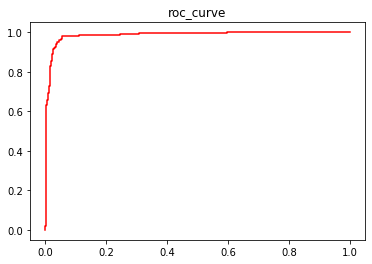

In [195]:
plt.plot(fpr,tpr,color='r')
plt.title('roc_curve')